In [16]:
import pandas as pd
import numpy as py
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as snb

In [2]:
df = pd.read_csv('iris.csv')

In [5]:
df['Species'] = df['Species'].str.replace('Iris', '')

In [38]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,-setosa
1,2,4.9,3.0,1.4,0.2,-setosa
2,3,4.7,3.2,1.3,0.2,-setosa
3,4,4.6,3.1,1.5,0.2,-setosa
4,5,5.0,3.6,1.4,0.2,-setosa
5,6,5.4,3.9,1.7,0.4,-setosa
6,7,4.6,3.4,1.4,0.3,-setosa
7,8,5.0,3.4,1.5,0.2,-setosa
8,9,4.4,2.9,1.4,0.2,-setosa
9,10,4.9,3.1,1.5,0.1,-setosa


In [7]:
num_col= df.select_dtypes(include= 'number')
stats = num_col.describe()
ranges = num_col.max() - num_col.min()
quantiles = num_col.quantile([0.25, .75, .5])
mode = num_col.mode().iloc(0)
variety_count= df['Species'].value_counts()
print(stats)
print(ranges)
print(variety_count)
print(quantiles)

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000
Id               149.0
SepalLengthCm      3.6
SepalWidthCm       2.4
PetalLengthCm      5.9
PetalWidthCm       2.4
dtype: float64
Species
-setosa        50
-versicolor    50
-virginica     50
Name: count, dtype: int64
          Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0.25   38.25            5.1

In [8]:
mean = df.groupby('Species').mean()
median = df.groupby('Species').median()
print(mean)
print(median)

                Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                     
-setosa       25.5          5.006         3.418          1.464         0.244
-versicolor   75.5          5.936         2.770          4.260         1.326
-virginica   125.5          6.588         2.974          5.552         2.026
                Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                     
-setosa       25.5            5.0           3.4           1.50           0.2
-versicolor   75.5            5.9           2.8           4.35           1.3
-virginica   125.5            6.5           3.0           5.55           2.0


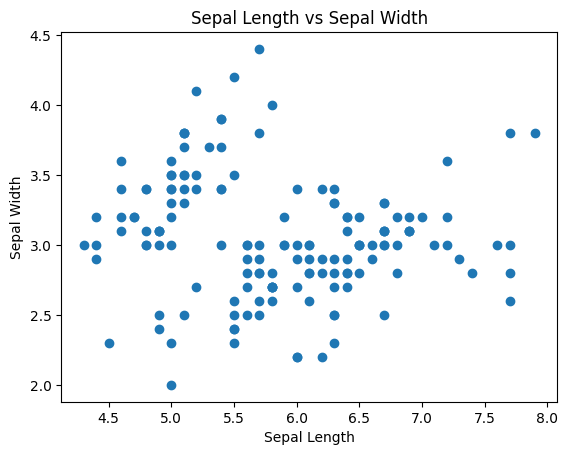

In [11]:
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Sepal Width')
plt.show()

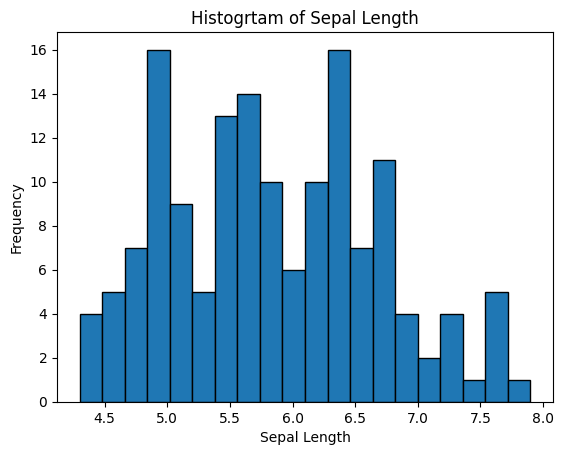

In [12]:
plt.hist(df['SepalLengthCm'], bins = 20, edgecolor='black')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.title('Histogrtam of Sepal Length')
plt.show()

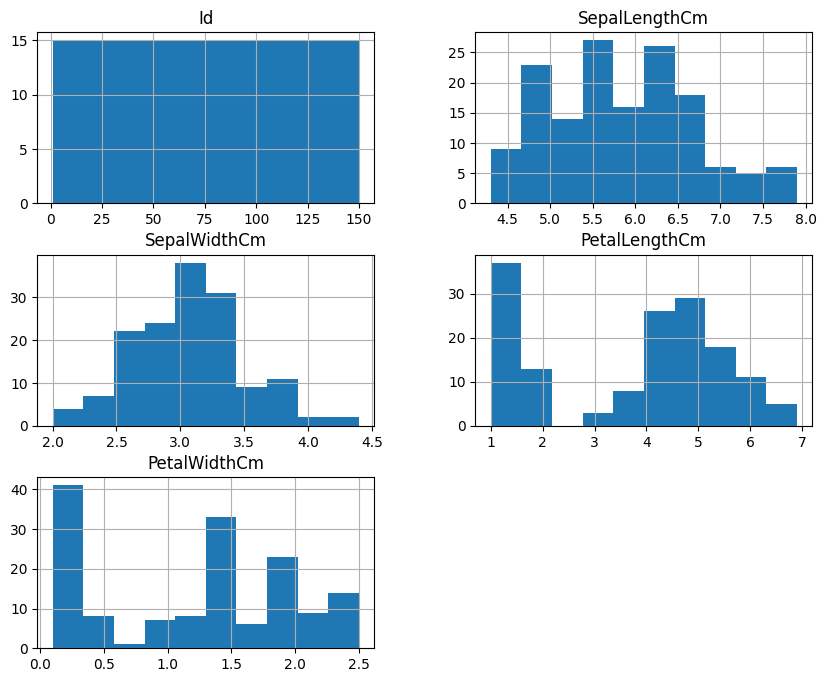

In [37]:
df.hist(figsize=(10,8))
plt.show()

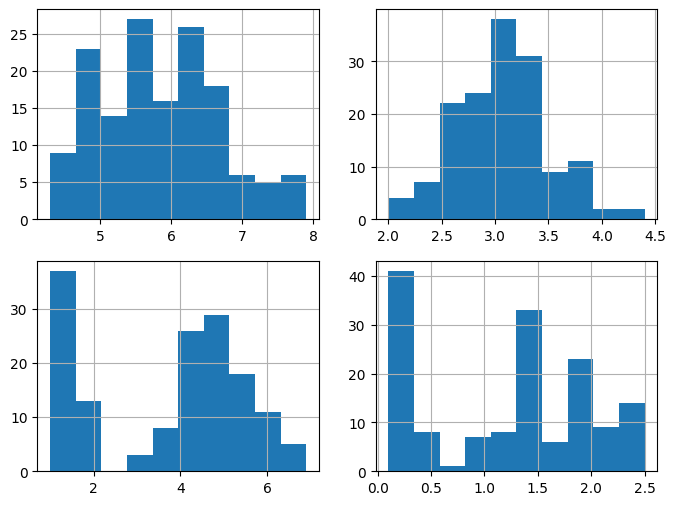

In [29]:
fig, axes= plt.subplots(nrows=2, ncols=2, figsize=(8,6))
df['SepalLengthCm'].hist(ax=axes[0,0])
df['SepalWidthCm'].hist(ax=axes[0,1])
df['PetalLengthCm'].hist(ax=axes[1,0])
df['PetalWidthCm'].hist(ax=axes[1,1])
plt.show()

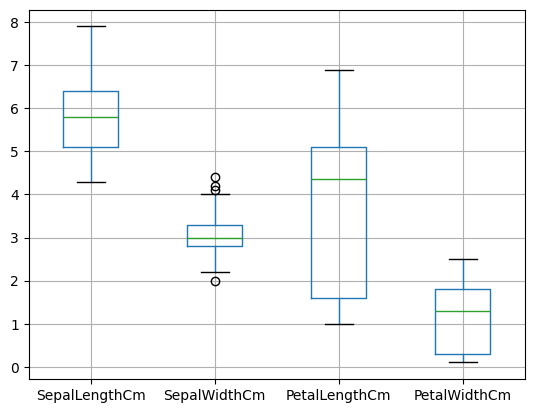

In [14]:
df.boxplot(column=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
plt.show()

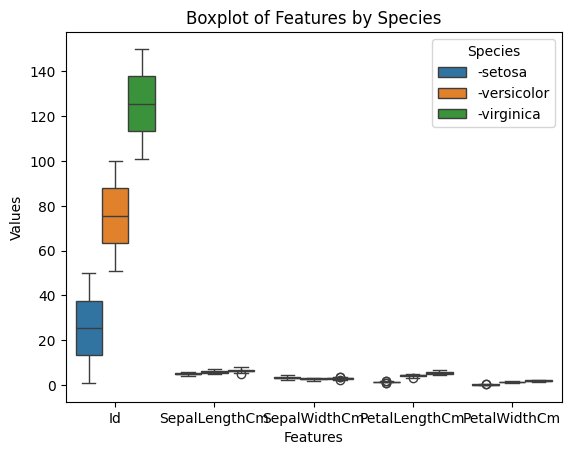

In [27]:
melted_data = pd.melt(df, id_vars='Species', var_name='variable', value_name='value')

snb.boxplot(x='variable', y='value', hue='Species', data=melted_data)
plt.title('Boxplot of Features by Species')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

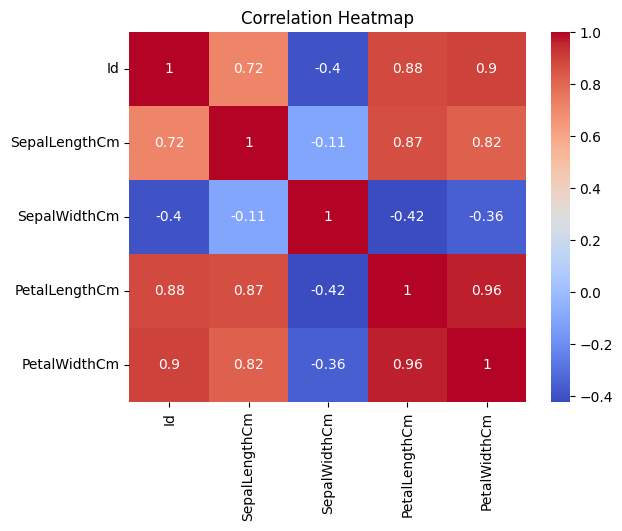

In [28]:
num_col = df.select_dtypes(include='number')
correlation_matrix = num_col.corr()
snb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()